# 1. Introduction to SVM 

Used SVM to build and train a model using human cell records, and classify cells to whether the samples are benign (mild state) or malignant (evil state).

SVM works by mapping data to a high-dimensional feature space so that data points can be categorized, even when the data are not otherwise linearly separable (This gets done by kernel function of SVM classifier). A separator between the categories is found, then the data is transformed in such a way that the separator could be drawn as a hyperplane.


# 2. Necessary imports

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt


# Load Data From CSV File 

In [2]:
df=pd.read_csv('cell_samples.csv')
df.tail()
df.shape
df.size
df.count()
df['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

# Distribution of the classes


<AxesSubplot:xlabel='Clump', ylabel='UnifSize'>

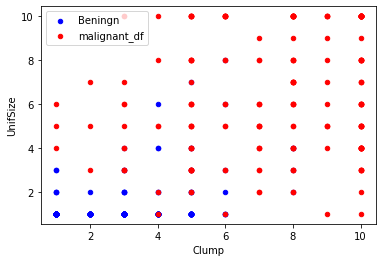

In [3]:
benign_df=df[df['Class']==2][0:200]
malignant_df=df[df['Class']==4][0:200]

axes=benign_df.plot(kind='scatter',x='Clump' , y='UnifSize' , color='blue',label='Beningn')
malignant_df.plot(kind='scatter',x='Clump' , y='UnifSize' , color='red',label='malignant_df',ax=axes)
#help(benign_df.plot())



# Selection of unwanted columns



In [4]:
df.dtypes

df=df[pd.to_numeric(df['BareNuc'],errors='coerce').notnull()]
df['BareNuc']=df['BareNuc'].astype('int')
df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int32
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

# Remove unwanted columns


In [5]:
df.columns
['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']

feature_set=df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]

#df 100 rows and 11 coloumns
#picked 9 colomns out of 11

#Independent varibles
X=np.asarray(feature_set)

#dependent varible y
y=np.asarray(df['Class'])

X[0:5]

y[0:5]

array([2, 2, 2, 2, 2], dtype=int64)

# Divide the data as Train/Test dataset


In [7]:

#df (100) ==>Train(80 rows)/test (20 rows) 
#Train(X,y) ## x itself is a 2D array.## y is 1D
#Test(X,y)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=4)
X_train.shape
y_train.shape

(546,)

# Modeling (SVM with Scikit-learn)


In [9]:
from sklearn import svm
classifier=svm.SVC(kernel='linear', gamma='auto', C=2)
classifier.fit(X_train,y_train)

y_predit=classifier.predict(X_test)
y_predit


array([2, 4, 2, 4, 2, 2, 2, 2, 4, 2, 2, 4, 4, 4, 4, 2, 2, 2, 2, 2, 4, 2,
       4, 4, 4, 4, 2, 2, 4, 4, 4, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4,
       4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 4, 4, 2, 4, 4,
       4, 2, 2, 2, 4, 4, 2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 4, 4, 2, 4,
       2, 2, 4, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 4, 2, 4, 2, 2, 4,
       2, 2, 4, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 2, 2, 4, 2, 2, 4, 2, 4, 2,
       2, 2, 2, 2, 4], dtype=int64)

# Evaluation (Results)

In [10]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predit))


              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137

